##Titanic Data Exploration

In this notebook, I'll try to understand what factors impact the survival of passengers on the Titanic.

###Setup

Before I begin, I'll load my data.

In [1]:
import pandas as pd
train = pd.read_csv('data/train.csv')

print train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


Are there any missing values?

In [2]:
print train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


###Preconceptions

I'll start by looking into the factors that I expect to be important. I've always heard that women and children get priority in a sinking ship situation, so those will be the first features I'll explore.

####Women

How do women's survival rate compare to men's?

In [3]:
grouped = train.groupby('Sex')
print grouped["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


We can see that women survived about **74%** of the time while men only **19%** of men survived. It seems that sex, as we thought, is an important factor for survival.

####Children

How do children's survival rate compare to the adult's rate?

In [6]:
def child_adult_grouper(passenger_id):
    age = train.loc[passenger_id, 'Age']
    if (age < 18):
        # Add a column while were at it
        train.loc[passenger_id, 'Child'] = 1
        return 'child'
    else:
        # Add a column while were at it
        train.loc[passenger_id, 'Child'] = 0
        return 'adult'

grouped = train.groupby(child_adult_grouper)
print grouped["Survived"].mean()

adult    0.361183
child    0.539823
Name: Survived, dtype: float64


We can see that children survived about **54%** of the time while adults only **36%** of men survived. It seems that age, as we thought, is also an important factor for survival.

I bet young females are most likely to survive.

In [38]:
grouped = train.groupby(['Sex', 'Child'])

# How big is each group?
print "Sample Sizes"
print grouped["Survived"].count()

print "\n-----------------------------\n"

# What percent of each group survived
print "Survival Rates"
sex_age_survival = grouped["Survived"].mean()
print sex_age_survival

Sample Sizes
Sex     Child
female  0        259
        1         55
male    0        519
        1         58
Name: Survived, dtype: int64

-----------------------------

Survival Rates
Sex     Child
female  0        0.752896
        1        0.690909
male    0        0.165703
        1        0.396552
Name: Survived, dtype: float64


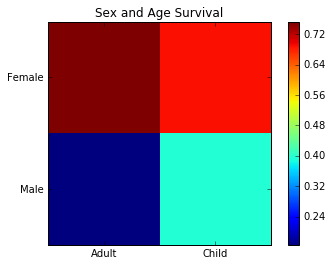

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_age_square = sex_age_survival.values.reshape((2, 2))
plt.imshow(sex_age_square, interpolation='nearest')

plt.title("Sex and Age Survival")
plt.colorbar()
plt.xticks([0, 1], ['Adult', 'Child'])
plt.yticks([0, 1], ['Female', 'Male'])
plt.show()

It actually looks like adult females are more likely to survive than young females. On the other hand, young men are more likely to survive than adult men.

####Socio-Economic Class

My last expectation is that passengers from higher classes were more likly to survive.

In [42]:
grouped = train.groupby('Pclass')
print grouped['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


It turns out we were right. As a passenger's socio-economic class increases, so does their chance to survive.

Let's see how likely upper class women were to survive.

In [51]:
grouped = train.groupby(['Sex', 'Pclass'])

# How big is each group?
print "Sample Sizes"
print grouped["Survived"].count()

print "\n-----------------------------\n"

# What percent of each group survived
print "Survival Rates"
sex_class_survival = grouped["Survived"].mean()
print sex_class_survival

Sample Sizes
Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

-----------------------------

Survival Rates
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


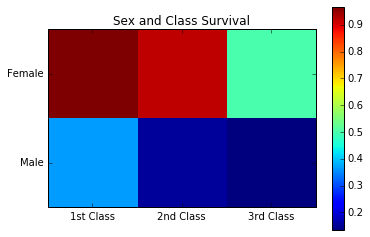

In [50]:
sex_class_square = sex_class_survival.values.reshape((2, 3))
plt.imshow(sex_class_square, interpolation='nearest')

plt.title("Sex and Class Survival")
plt.colorbar()
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.yticks([0, 1], ['Female', 'Male'])
plt.show()

High class females are very likely to survive and low class males are very unlikely to survive

It looks like all of our preconceptions were true to some extent.

##Investigation

Now we should look into the rest of the features.

####SibSp

The SibSp column shows the "Number of Siblings/Spouses Aboard" the titanic. Let's see how significant it is.

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


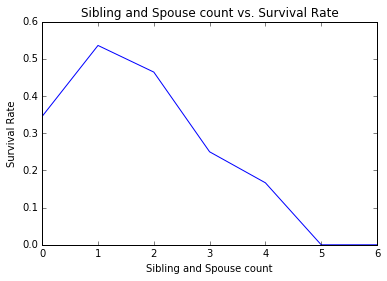

In [63]:
grouped = train.groupby('SibSp')
sibsp_survival = grouped['Survived'].mean()
print sibsp_survival

x = range(sibsp_survival.count())
y = sibsp_survival.values

plt.plot(x, y)
plt.title('Sibling and Spouse count vs. Survival Rate')
plt.xlabel('Sibling and Spouse count')
plt.ylabel('Survival Rate')
plt.show()

It appears that people with one sibling or spouse are mouse likely to survive. Having more than one sibling or spouse decreases your chances.

####Parch

The Parch column shows the "Number of Parents/Children Aboard" the titanic. Let's see how significant it is.

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


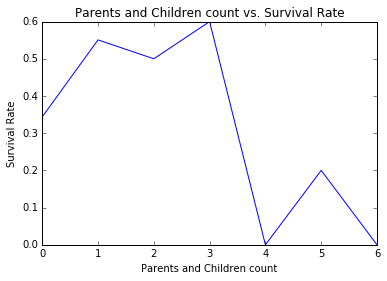

In [64]:
grouped = train.groupby('Parch')
parch_survival = grouped['Survived'].mean()
print parch_survival

x = range(parch_survival.count())
y = parch_survival.values

plt.plot(x, y)
plt.title('Parents and Children count vs. Survival Rate')
plt.xlabel('Parents and Children count')
plt.ylabel('Survival Rate')
plt.show()

Survival peaks when a passenger has 3 parents and children.

####Ticket

The Ticket column shows the passenger's Ticket Number. Let's see how it's formatted.

In [288]:
unique_tickets = train.Ticket.unique()
print "%d unique tickets" % len(unique_tickets)

681 unique tickets


In [289]:
print "some of the tickets:"
print train.Ticket[:25]

some of the tickets:
0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
Name: Ticket, dtype: object


Maybe the numbers are meaningful. Let's extract just the digits.

In [291]:
import re
regex = re.compile('[^\d]')

def get_ticket_num(ticket):
    # remove everything but digits
    num = regex.sub('', ticket)
    try:
        return int(num)
    except ValueError:
        print "error:", ticket

train['TicketNum'] = train.Ticket.apply(get_ticket_num)

print "\nSome of the ticket numbers:"
print train.TicketNum[:25]

error: LINE
error: LINE
error: LINE
error: LINE

Some of the ticket numbers:
0       521171
1        17599
2     23101282
3       113803
4       373450
5       330877
6        17463
7       349909
8       347742
9       237736
10        9549
11      113783
12       52151
13      347082
14      350406
15      248706
16      382652
17      244373
18      345763
19        2649
20      239865
21      248698
22      330923
23      113788
24      349909
Name: TicketNum, dtype: float64


Now that we have the digit component of the ticket, let's see if the numerical ordering of the tickets relates to a passenger's survival.

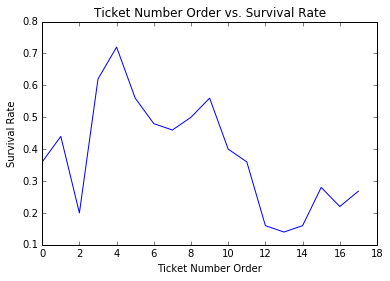

In [212]:
def group_by_n_rows(nrows, df):
    groups = []
    for index in range(0, len(df), nrows):
        group = df[index:index+nrows]
        groups.append(group)
    return groups

groups = group_by_n_rows(50, train_ticket_order)
survival_rates = [group.Survived.mean() for group in groups]
    
x = range(len(survival_rates))
plt.plot(x, survival_rates)

plt.title('Ticket Number Order vs. Survival Rate')
plt.ylabel('Survival Rate')
plt.xlabel('Ticket Number Order')

plt.show()

It appears that the average survival rate peaks around group 4. This group corresponds the the people with the 200-250th ticket.

####Fare

Based on our finding that upper class passengers were more likely to survive, I bet people who payed higher fares also were more fortunate.

In [107]:
print train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [293]:
grouped = train.groupby('Survived')
print grouped.Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


On average, the survivors paid more than double the fare of unfortunate passengers.

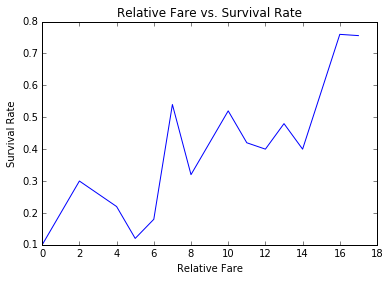

In [297]:
train_fare_order = train.sort_values('Fare')

groups = group_by_n_rows(50, train_fare_order)
survival_rates = [group.Survived.mean() for group in groups]

plt.plot(range(len(survival_rates)), survival_rates)

plt.title('Relative Fare vs. Survival Rate')
plt.xlabel('Relative Fare')
plt.ylabel('Survival Rate')

plt.show()

Survival rates increase as the passenger's fare increases.

####Cabin

In [252]:
print train.Cabin.unique()
print "\nNumber of null cabins:", sum(train.Cabin.isnull())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']

Number of null cabins: 687


Maybe people within the same lettered cabin had similar survival rates.

Passengers in each cabin:
?    687
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
dtype: int64

------------------------

Survival Rates:
?    0.299854
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64


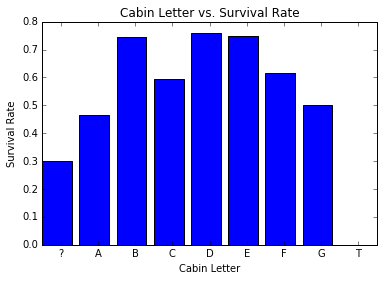

In [279]:
import math

def cabin_letter_group(passenger_id):
    cabin = train.loc[passenger_id, 'Cabin']
    
    # check for null cabins
    # null is a float apparently
    if type(cabin) == float:
        return '?'
    else:
        return str(cabin[0])
        

grouped = train.groupby(cabin_letter_group)
survival_rates = grouped.Survived.mean()
names = [name[0] for name in grouped]

print "Passengers in each cabin:"
print grouped.size()

print "\n------------------------\n"

print "Survival Rates:"
print survival_rates

ax = plt.subplot(111)

x = range(len(names))
ax.bar(x, survival_rates)

ticks = map(lambda x: x + 0.5, x)
plt.xticks(ticks, names)
plt.title('Cabin Letter vs. Survival Rate')
plt.xlabel('Cabin Letter')
plt.ylabel('Survival Rate')
plt.show()

Because there are so few passengers in any of the labeled cabins, it is unlikely that the results are that meaningful.

####Embarked

The embarked column shows the port where each passenger embarked. (C = Cherbourg; Q = Queenstown; S = Southampton)

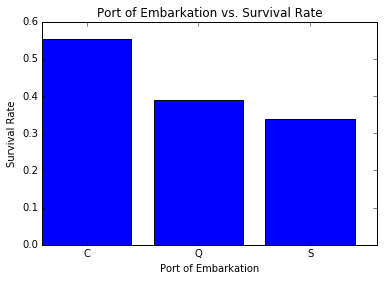

In [287]:
grouped = train.groupby('Embarked')
survival_rates = grouped.Survived.mean()
names = [name[0] for name in grouped]

ax = plt.subplot(111)
x = range(len(names))

barwidth = 0.8
ax.bar(x, survival_rates, width=barwidth)

ticks = map(lambda x: x + barwidth/2, x)
plt.xticks(ticks, names)
plt.title('Port of Embarkation vs. Survival Rate')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

plt.show()

It looks like passengers who embarked from Cherbourg were most likely to survive.

###Conclusions

Just as expected, the most significant survival factors were sex, age, and socio-economic class. It also turns out that the amount a passenger paid is also a good indication of their survival. Most of the ramaining features do not appear to be important.